<a href="https://colab.research.google.com/github/Hibath-K/HibathullaTheAnalyst.github.io/blob/main/dental21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Dependencies**

In [ ]:
import pandas as pd
from fbprophet import Prophet
import numpy as np


**Load data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dental21.csv to dental21.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['dental21.csv']))

In [ ]:
df.head()

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,30-12-21,clinic_2,70172,1030,30,98.13
1,29-12-21,clinic_1,53371,756,15,65.13
2,29-12-21,clinic_2,69545,1030,30,105.18
3,27-12-21,clinic_1,43859,756,30,58.11
4,23-12-21,clinic_1,69303,756,30,119.00


**Apply Data Preprocessing**

In [ ]:
df.dtypes

appointment_date              object
clinic_name                   object
patient_id                     int64
practitioner_id                int64
appointment_duration_min       int64
revenues_from_appointment    float64
dtype: object

In [ ]:
df['appointment_date'] = pd.to_datetime(df['appointment_date'])

In [ ]:
df.dtypes

appointment_date             datetime64[ns]
clinic_name                          object
patient_id                            int64
practitioner_id                       int64
appointment_duration_min              int64
revenues_from_appointment           float64
dtype: object

In [ ]:
df

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,2021-12-30,clinic_2,70172,1030,30,98.13
1,2021-12-29,clinic_1,53371,756,15,65.13
2,2021-12-29,clinic_2,69545,1030,30,105.18
3,2021-12-27,clinic_1,43859,756,30,58.11
4,2021-12-23,clinic_1,69303,756,30,119.00
...,...,...,...,...,...,...
4066,2021-08-19,clinic_1,44907,755,30,83.87
4067,2021-02-09,clinic_1,45056,757,30,79.91
4068,2021-08-19,clinic_1,44919,757,30,90.10
4069,2021-07-22,clinic_1,45055,755,30,90.90


In [ ]:
df1 = df.copy()

In [ ]:
df1.drop('clinic_name',	axis = 1, inplace = True)

In [ ]:
df1.drop('patient_id',	axis = 1, inplace = True)

In [ ]:
df1.drop('practitioner_id',	axis = 1, inplace = True)

In [ ]:
df1.drop('appointment_duration_min',	axis = 1, inplace = True)

In [ ]:
df1

,appointment_date,revenues_from_appointment
0,2021-12-30,98.13
1,2021-12-29,65.13
2,2021-12-29,105.18
3,2021-12-27,58.11
4,2021-12-23,119.00
...,...,...
4066,2021-08-19,83.87
4067,2021-02-09,79.91
4068,2021-08-19,90.10
4069,2021-07-22,90.90


In [ ]:
df1 = df1.sort_values(by=['appointment_date'])

In [ ]:
df1 

,appointment_date,revenues_from_appointment
924,2021-01-07,100.26
1992,2021-01-07,101.03
1438,2021-01-07,101.03
4053,2021-01-07,101.03
1440,2021-01-07,40.31
...,...,...
1020,2021-12-30,105.68
1100,2021-12-30,470.38
1452,2021-12-30,41.71
967,2021-12-30,79.19


In [ ]:
df1.columns = ['ds', 'y']

In [ ]:
df1.head()

,ds,y
924,2021-01-07,100.26
1992,2021-01-07,101.03
1438,2021-01-07,101.03
4053,2021-01-07,101.03
1440,2021-01-07,40.31


**Create Time Series Model**

In [ ]:
m = Prophet(interval_width=0.95)

In [ ]:
training_run = m.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=400, freq= 'D')

In [ ]:
future.head()

,ds
0,2021-01-07
1,2021-01-09
2,2021-01-10
3,2021-01-12
4,2021-02-07


**Forecast Data/ Evaluate Model**

In [ ]:
forecast = m.predict(df1)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-07,148.610098,-358.255132,638.952382,148.610098,148.610098,-14.364119,-14.364119,-14.364119,-14.364119,-14.364119,-14.364119,0.0,0.0,0.0,134.245979
1,2021-01-07,148.610098,-359.867563,618.666822,148.610098,148.610098,-14.364119,-14.364119,-14.364119,-14.364119,-14.364119,-14.364119,0.0,0.0,0.0,134.245979
2,2021-01-07,148.610098,-364.647140,588.777021,148.610098,148.610098,-14.364119,-14.364119,-14.364119,-14.364119,-14.364119,-14.364119,0.0,0.0,0.0,134.245979
3,2021-01-07,148.610098,-335.876544,617.933669,148.610098,148.610098,-14.364119,-14.364119,-14.364119,-14.364119,-14.364119,-14.364119,0.0,0.0,0.0,134.245979
4,2021-01-07,148.610098,-362.438549,597.451969,148.610098,148.610098,-14.364119,-14.364119,-14.364119,-14.364119,-14.364119,-14.364119,0.0,0.0,0.0,134.245979


In [ ]:
df1.head()

,ds,y
924,2021-01-07,100.26
1992,2021-01-07,101.03
1438,2021-01-07,101.03
4053,2021-01-07,101.03
1440,2021-01-07,40.31


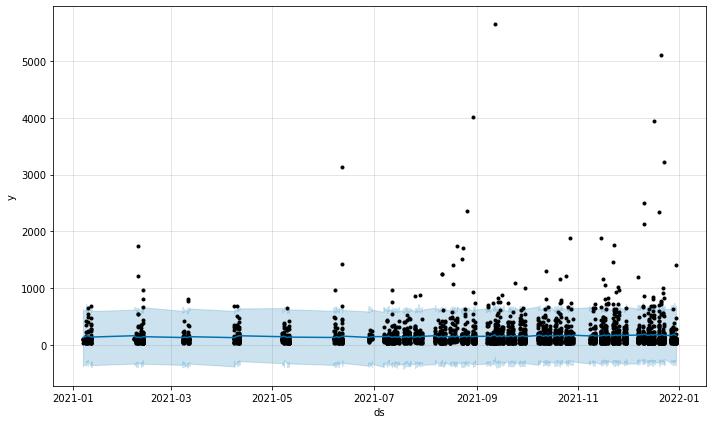

In [ ]:
plot = m.plot(forecast)

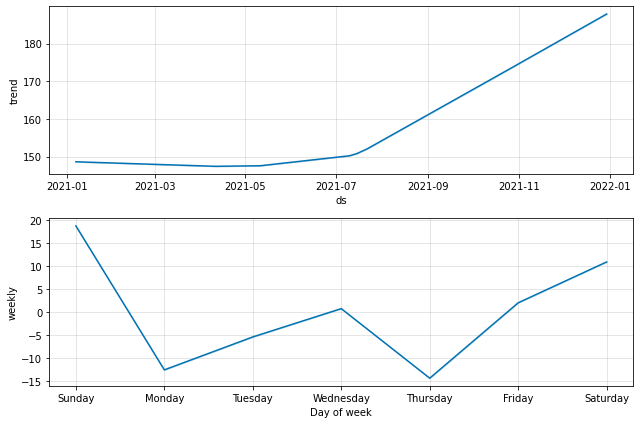

In [ ]:
plot2 = m.plot_components(forecast)